In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
####### Compare mesoscale and LES domains for one hurricane simulation ########
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_27 = "/projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_30 = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_28 = "/projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/
WRF_DIRECTORY_31 = "/scratch/mgomez/STORM/idealSims/sst_31_skipd01_skipCoLES_ndg/cropped/"
WRF_DIRECTORY_32 = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/" # precursor/

dir_for_height = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/"

WRF_DIRS_d01 = [WRF_DIRECTORY_26,WRF_DIRECTORY_27,WRF_DIRECTORY_30,WRF_DIRECTORY_31,WRF_DIRECTORY_32]
WRF_DIRS_d01 = [WRF_DIRECTORY_26,WRF_DIRECTORY_27,WRF_DIRECTORY_30,WRF_DIRECTORY_28,WRF_DIRECTORY_32]
WRF_DIRS_d02 = [WRF_DIRECTORY_26,WRF_DIRECTORY_27,WRF_DIRECTORY_30,WRF_DIRECTORY_28,WRF_DIRECTORY_32]

# Choose which domain to evaluate
domains = ['d01','d02'] # ,'prec'

# Whether or not to save figures
saveFig = False

# Vertical level to get max wind speed
i_z_max = 0

dirFig = "/projects/storm/mgomez/idealSims/Figures/"

# Whether or not to apply Gaussian filter to vertical velocity in LES domains
filt_w = False

# Whether or not to compare velocity fields from precursor
use_prec = False

In [3]:
#%% Turbine characteristics
z_hh = 150
D_turb = 240

In [4]:
#%% Common attributes
numSims = 5
azm = 100
zz = 29


In [5]:
#%% Load data for Domain d01

## Initialize arrays for Domain d01
rr = 200
UV_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
Ut_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
Un_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
w_d01 = np.zeros([numSims,azm,zz,rr]) + np.nan
z_d01 = np.zeros([numSims,zz]) + np.nan
r_d01 = np.zeros([numSims,rr]) + np.nan

WRF_DIRS = WRF_DIRS_d01

for idir in np.arange(len(WRF_DIRS)):
    ## Load data for domain d01
    ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d01.nc",decode_times=False)
    UV_temp = np.array(ds['UV'])
    Ut_temp = np.array(ds['Ut'])
    Un_temp = np.array(ds['Un'])
    w_temp = np.array(ds['w'])
    z_temp = np.array(ds['w'].z)
    r_temp = np.array(ds['w'].r)
    ds.close()
    # Save data
    UV_d01[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
    Ut_d01[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
    Un_d01[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
    w_d01[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
    z_d01[idir,0:len(z_temp)] = z_temp
    r_d01[idir,0:len(r_temp)] = r_temp
    print('Done with domain d01 ' + str(WRF_DIRS[idir]))
    



Done with domain d01 /projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d01 /projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/


In [6]:
#%% Load data for Domain d02

## Initialize arrays for Domain d02
rr = 700
UV_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
Ut_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
Un_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
w_d02 = np.zeros([numSims,azm,zz,rr]) + np.nan
z_d02 = np.zeros([numSims,zz]) + np.nan
r_d02 = np.zeros([numSims,rr]) + np.nan

WRF_DIRS = WRF_DIRS_d02

for idir in np.arange(len(WRF_DIRS)):
    ## Load data for domain d02
    ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d02.nc",decode_times=False)
    UV_temp = np.array(ds['UV'])
    Ut_temp = np.array(ds['Ut'])
    Un_temp = np.array(ds['Un'])
    w_temp = np.array(ds['w'])
    z_temp = np.array(ds['w'].z)
    r_temp = np.array(ds['w'].r)
    azmth = np.array(ds['w'].a)
    ds.close()
    # Save data
    UV_d02[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
    Ut_d02[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
    Un_d02[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
    w_d02[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
    z_d02[idir,0:len(z_temp)] = z_temp
    r_d02[idir,0:len(r_temp)] = r_temp
    print('Done with domain d02 ' + str(WRF_DIRS[idir]))

Done with domain d02 /projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/cropped/
Done with domain d02 /projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/cropped/


In [7]:
#%% Load data for precursor domain

if use_prec:
    ## Initialize arrays for precursor domain
    rr = 50
    UV_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    Ut_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    Un_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    w_d03 = np.zeros([numSims,azm,zz,rr]) + np.nan
    z_d03 = np.zeros([numSims,zz]) + np.nan
    r_d03 = np.zeros([numSims,rr]) + np.nan

    for idir in np.arange(len(WRF_DIRS)):
        ## Load data for domain d03
        ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d01_prec.nc",decode_times=False)
        UV_temp = np.array(ds['UV'])
        Ut_temp = np.array(ds['Ut'])
        Un_temp = np.array(ds['Un'])
        w_temp = np.array(ds['w'])
        z_temp = np.array(ds['w'].z)
        r_temp = np.array(ds['w'].r)
        ds.close()
        # Save data
        UV_d03[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
        Ut_d03[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
        Un_d03[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
        w_d03[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
        z_d03[idir,0:len(z_temp)] = z_temp
        r_d03[idir,0:len(r_temp)] = r_temp
        print('Done with domain d03 ' + str(WRF_DIRS[idir]))

In [8]:
# #%% Load data for Domain d04

# ## Initialize arrays for Domain d04
# rr = 400
# UV_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Ut_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# Un_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# w_d04 = np.zeros([numSims,azm,zz,rr]) + np.nan
# z_d04 = np.zeros([numSims,zz]) + np.nan
# r_d04 = np.zeros([numSims,rr]) + np.nan

# for idir in np.arange(len(WRF_DIRS)):
#     ## Load data for domain d04
#     ds = xr.open_dataset(WRF_DIRS[idir]+"azmth_d04.nc",decode_times=False)
#     UV_temp = np.array(ds['UV'])
#     Ut_temp = np.array(ds['Ut'])
#     Un_temp = np.array(ds['Un'])
#     w_temp = np.array(ds['w'])
#     z_temp = np.array(ds['w'].z)
#     r_temp = np.array(ds['w'].r)
#     ds.close()
#     # Save data
#     UV_d04[idir,:,0:len(z_temp),0:len(r_temp)] = UV_temp
#     Ut_d04[idir,:,0:len(z_temp),0:len(r_temp)] = Ut_temp
#     Un_d04[idir,:,0:len(z_temp),0:len(r_temp)] = Un_temp
#     w_d04[idir,:,0:len(z_temp),0:len(r_temp)] = w_temp
#     z_d04[idir,0:len(z_temp)] = z_temp
#     r_d04[idir,0:len(r_temp)] = r_temp
#     print('Done with domain d04 ' + str(WRF_DIRS[idir]))

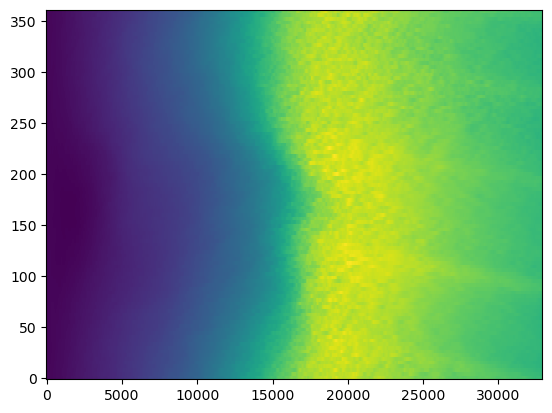

In [9]:
#%% Plan view of horizontal wind speed

isim = 1

plt.figure()
rr = r_d02[isim,:]
var = UV_d02[isim,:,0,:]
var = var[:,np.logical_not(np.isnan(rr))]
rr = rr[np.logical_not(np.isnan(rr))]
plt.pcolormesh(rr,azmth,var)
# plt.
# stop

In [10]:
#%% Restric azimuthal angles
restrict = False
if restrict:
    allow_azmth_26 = [300,50]
    allow_azmth_28 = [100,250]
    allow_azmth_30 = [150,250]
    allow_azmth_all = [allow_azmth_26,allow_azmth_30,allow_azmth_28]
    
    for isim in np.arange(numSims):
        if allow_azmth_all[isim][0]<allow_azmth_all[isim][1]:
            iaas = (azmth<allow_azmth_all[isim][0]) | (azmth>allow_azmth_all[isim][1])
        else:
            iaas = (azmth<allow_azmth_all[isim][0]) & (azmth>allow_azmth_all[isim][1])
        ## Domain d01
        UV_d01[isim,iaas,:,:] = np.nan
        Ut_d01[isim,iaas,:,:] = np.nan
        Un_d01[isim,iaas,:,:] = np.nan
        w_d01[isim,iaas,:,:] = np.nan
        ## Domain d02
        UV_d02[isim,iaas,:,:] = np.nan
        Ut_d02[isim,iaas,:,:] = np.nan
        Un_d02[isim,iaas,:,:] = np.nan
        w_d02[isim,iaas,:,:] = np.nan
        if use_prec:
            ## Domain d03
            UV_d03[isim,iaas,:,:] = np.nan
            Ut_d03[isim,iaas,:,:] = np.nan
            Un_d03[isim,iaas,:,:] = np.nan
            w_d03[isim,iaas,:,:] = np.nan
#         ## Domain d04
#         UV_d04[isim,iaas,:,:] = np.nan
#         Ut_d04[isim,iaas,:,:] = np.nan
#         Un_d04[isim,iaas,:,:] = np.nan
#         w_d04[isim,iaas,:,:] = np.nan
#         ## Domain d05
#         UV_d05[isim,iaas,:,:] = np.nan
#         Ut_d05[isim,iaas,:,:] = np.nan
#         Un_d05[isim,iaas,:,:] = np.nan
#         w_d05[isim,iaas,:,:] = np.nan

#         print(azmth[iaas])
        


In [11]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
colores = [col_26,col_28,col_30]
colores = ['steelblue','tab:green','goldenrod','firebrick','tab:purple']

labels = ['26','27','30','31','32'] # ['26','27','28','30','32'] 
labels_cat = ['1','2','3','4','5']

## Wind direction in domain

In [12]:
#%% Calculate wind direction

## Domain d01
wDir_d01 = np.zeros(np.shape(Un_d01)) # [numSims,azm,zz,rr]
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for iz in np.arange(len(z_d01[isim,:])):
            uu = np.zeros_like(Un_d01[isim,iazm,iz,:]) + Un_d01[isim,iazm,iz,:]
            vv = np.zeros_like(Ut_d01[isim,iazm,iz,:]) + Ut_d01[isim,iazm,iz,:]
            wDir_d01[isim,iazm,iz,:] = np.arctan2(vv,uu)*180/np.pi
# Wind direction in engineering coordinates (from [1,0] vector )
wDir_d01[wDir_d01<0] = (180 + wDir_d01[wDir_d01<0]) + 180

## Domain d02
wDir_d02 = np.zeros(np.shape(Un_d02)) # [numSims,azm,zz,rr]
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for iz in np.arange(len(z_d02[isim,:])):
            uu = np.zeros_like(Un_d02[isim,iazm,iz,:]) + Un_d02[isim,iazm,iz,:]
            vv = np.zeros_like(Ut_d02[isim,iazm,iz,:]) + Ut_d02[isim,iazm,iz,:]
            wDir_d02[isim,iazm,iz,:] = np.arctan2(vv,uu)*180/np.pi
# Wind direction in engineering coordinates (from [1,0] vector )
wDir_d02[wDir_d02<0] = (180 + wDir_d02[wDir_d02<0]) + 180

if use_prec:
    ## Domain d03
    wDir_d03 = np.zeros(np.shape(Un_d03)) # [numSims,azm,zz,rr]
    for isim in np.arange(numSims):
        for iazm in np.arange(azm):
            for iz in np.arange(len(z_d03[isim,:])):
                uu = np.zeros_like(Un_d03[isim,iazm,iz,:]) + Un_d03[isim,iazm,iz,:]
                vv = np.zeros_like(Ut_d03[isim,iazm,iz,:]) + Ut_d03[isim,iazm,iz,:]
                wDir_d03[isim,iazm,iz,:] = np.arctan2(vv,uu)*180/np.pi
    # Wind direction in engineering coordinates (from [1,0] vector )
    wDir_d03[wDir_d03<0] = (180 + wDir_d03[wDir_d03<0]) + 180

# ## Domain d04
# wDir_d04 = np.zeros(np.shape(Un_azm_d04))
# for isim in np.arange(numSims):
#     for iz in np.arange(len(z_d04[isim,:])):
#         uu = np.zeros_like(Un_azm_d04[isim,iz,:]) + Un_azm_d04[isim,iz,:]
#         vv = np.zeros_like(Ut_azm_d04[isim,iz,:]) + Ut_azm_d04[isim,iz,:]
#         wDir_d04[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# # Wind direction in engineering coordinates (from [1,0] vector )
# wDir_d04[wDir_d04<0] = (180 + wDir_d04[wDir_d04<0]) + 180

# ## Domain d05
# wDir_d05 = np.zeros(np.shape(Un_azm_d05))
# for isim in np.arange(numSims):
#     for iz in np.arange(len(z_d05[isim,:])):
#         uu = np.zeros_like(Un_azm_d05[isim,iz,:]) + Un_azm_d05[isim,iz,:]
#         vv = np.zeros_like(Ut_azm_d05[isim,iz,:]) + Ut_azm_d05[isim,iz,:]
#         wDir_d05[isim,iz,:] = np.arctan2(vv,uu)*180/np.pi
# # Wind direction in engineering coordinates (from [1,0] vector )
# wDir_d05[wDir_d05<0] = (180 + wDir_d05[wDir_d05<0]) + 180

## Function that defines power-law wind profile

In [13]:

def powLaw(z_z,alpha):
    u_o = u_curr;
    UUU = u_o*((z_z/z_hh)**alpha)
    return UUU


## Define height array within turbine rotor layer

In [14]:
#%% New finer array

z_both = 0.5*(np.mean(z_d01,axis=0) + np.mean(z_d02,axis=0))
lower_z = z_hh-0.5*D_turb
upper_z = z_hh+0.6*D_turb

z_interp = np.arange(z_hh-0.5*D_turb,z_hh+0.5*D_turb+2,2)
print("Rotor layer between %f m and %f m" % (z_hh-0.5*D_turb,z_hh+0.5*D_turb))
# i_RL = np.arange()

Rotor layer between 30.000000 m and 270.000000 m


## Radius of maximum wind speed

In [15]:
#%% Average horizontal velocity field azimuthally to estiamte RMW

## Domain d01
UV_azm_d01 = np.nanmean(UV_d01,axis=1)

## Domain d02
UV_azm_d02 = np.nanmean(UV_d02,axis=1)

if use_prec:
    ## Domain d03
    UV_azm_d03 = np.nanmean(UV_d03,axis=1)
    

/tmp/ipykernel_2044965/2219420194.py:4: RuntimeWarning: Mean of empty slice
  UV_azm_d01 = np.nanmean(UV_d01,axis=1)
/tmp/ipykernel_2044965/2219420194.py:7: RuntimeWarning: Mean of empty slice
  UV_azm_d02 = np.nanmean(UV_d02,axis=1)


In [16]:
#%% Find radius of maximum wind speed for each domain and each simulation

# Height to define radius of maximum winds
iz = 0

# Initialize arrays
R_d01 = np.zeros([numSims])
R_d02 = np.zeros([numSims])
R_d03 = np.zeros([numSims])
# R_d04 = np.zeros([numSims])
# R_d05 = np.zeros([numSims])

# Find radius of maximum wind speed
for isim in np.arange(numSims):
    ## Domain d01
    R_d01[isim] = r_d01[isim,np.nanargmax(UV_azm_d01[isim,iz,:])]
    ## Domain d02
    R_d02[isim] = r_d02[isim,np.nanargmax(UV_azm_d02[isim,iz,:])]
    if use_prec:
        ## Domain d03
        R_d03[isim] = r_d03[isim,np.nanargmax(UV_azm_d03[isim,iz,:])]
#     ## Domain d04
#     R_d04[isim] = r_d04[isim,np.nanargmax(UV_azm_d04[isim,iz,:])]
#     ## Domain d05
#     R_d05[isim] = r_d05[isim,np.nanargmax(UV_azm_d05[isim,iz,:])]

print(R_d01/1000)
print(R_d02/1000)
print(R_d03/1000)
# print(R_d04/1000)
# print(R_d05/1000)



[25.5 21.  18.  16.5 21. ]
[25.27779764 19.94446012 20.61112731 15.83334578 20.38890491]
[0. 0. 0. 0. 0.]


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2044965/4052143604.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


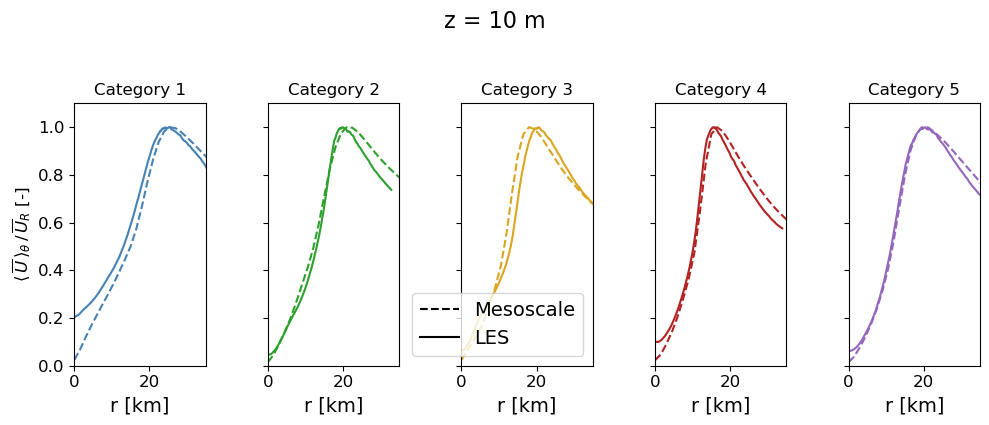

In [17]:
#%% Compare eyewall radius for each domain and each hurricane

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,1.1]
iz = 0

plt.figure(figsize=(10,4))
plt.suptitle(r"z = 10 m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    
    plt.title(r"Category " + labels_cat[isim])

    
    ## Domain d01
    rr = r_d01[isim,:]/1000
    plt.plot(rr,UV_azm_d01[isim,iz,:]/np.nanmax(UV_azm_d01[isim,iz,:]),color=colores[isim],linestyle='--')
    
    ## Domain d02
    rr = r_d02[isim,:]/1000
    plt.plot(rr,UV_azm_d02[isim,iz,:]/np.nanmax(UV_azm_d02[isim,iz,:]),color=colores[isim])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/1000
        plt.plot(rr,UV_azm_d03[isim,iz,:]/np.nanmax(UV_azm_d03[isim,iz,:]),color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/1000
#     plt.plot(rr,UV_azm_d04[isim,iz,:]/np.nanmax(UV_azm_d04[isim,iz,:]),color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/1000
#     plt.plot(rr,UV_azm_d05[isim,iz,:]/np.nanmax(UV_azm_d05[isim,iz,:]),color=cols[4])
    
    ## Labels and limits
    if isim==len(domains):
        plt.plot([-1,-1],[-1,-1],color='black',label='Mesoscale',linestyle='--')
        plt.plot([-1,-1],[-1,-1],color='black',label='LES')
        if use_prec:
            plt.plot([-1,-1],[-1,-1],color=cols[2],label='prec')
#         plt.plot([-1,-1],[-1,-1],color=cols[3],label='d04')
#         plt.plot([-1,-1],[-1,-1],color=cols[4],label='d05')
        plt.legend(loc=4,fontsize=14)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}\,\rangle_{\theta}\,/\,\overline{U}_{R}$ [-]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('r [km]',fontsize=14)
    plt.xlim([0,35])
    
plt.tight_layout()
if saveFig:
    plt.savefig(dirFig + "R_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2044965/186782442.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")


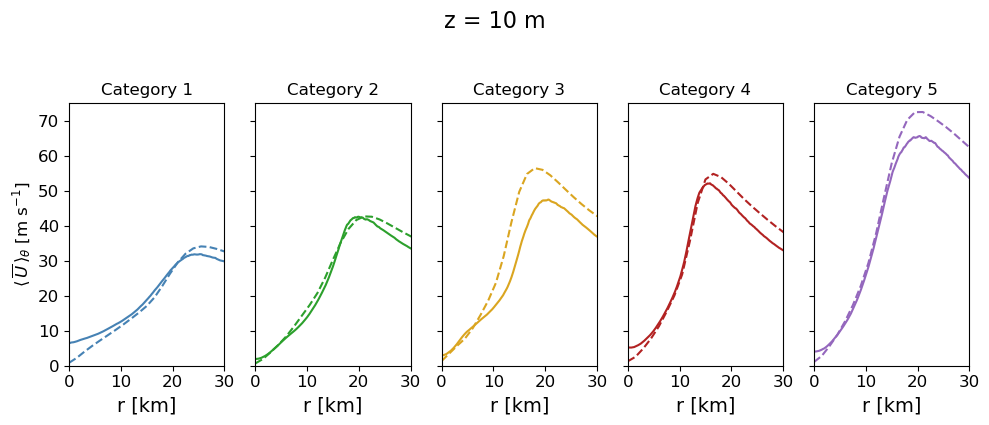

In [18]:
#%% Compare eyewall radius for each domain and each hurricane

cols = plt.cm.cividis(np.linspace(0,1,len(domains)))

yLim = [0,75]
iz = 0

plt.figure(figsize=(10,4))
plt.suptitle(r"z = 10 m",fontsize=16,y=1.05)
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    
    plt.title(r"Category " + labels_cat[isim])

    
    ## Domain d01
    rr = r_d01[isim,:]/1000
    plt.plot(rr,UV_azm_d01[isim,iz,:],color=colores[isim],linestyle='--')
    
    ## Domain d02
    rr = r_d02[isim,:]/1000
    plt.plot(rr,UV_azm_d02[isim,iz,:],color=colores[isim])
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/1000
        plt.plot(rr,UV_azm_d03[isim,iz,:],color=cols[2])
    
#     ## Domain d04
#     rr = r_d04[isim,:]/1000
#     plt.plot(rr,UV_azm_d04[isim,iz,:]/np.nanmax(UV_azm_d04[isim,iz,:]),color=cols[3])
    
#     ## Domain d05
#     rr = r_d05[isim,:]/1000
#     plt.plot(rr,UV_azm_d05[isim,iz,:]/np.nanmax(UV_azm_d05[isim,iz,:]),color=cols[4])
    
    ## Labels and limits
    if isim==len(domains):
        plt.plot([-1,-1],[-1,-1],color='black',label='Mesoscale',linestyle='--')
        plt.plot([-1,-1],[-1,-1],color='black',label='LES')
        if use_prec:
            plt.plot([-1,-1],[-1,-1],color=cols[2],label='prec')
#         plt.plot([-1,-1],[-1,-1],color=cols[3],label='d04')
#         plt.plot([-1,-1],[-1,-1],color=cols[4],label='d05')
        # plt.legend(loc=4,fontsize=14)
    plt.ylim(yLim)
    if isim==0:
        plt.ylabel(r'$\langle\,\overline{U}\,\rangle_{\theta}$ [m s$^{-1}$]',fontsize=12)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('r [km]',fontsize=14)
    plt.xlim([0,30])
    
plt.tight_layout()
if saveFig:
    plt.savefig(dirFig + "R_meso_LES.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


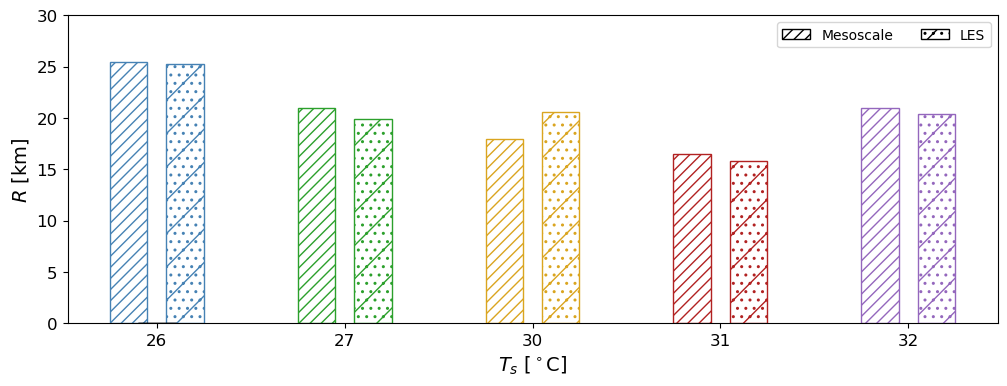

In [19]:
#%% Visualize radius of maximum winds for each simulatio and each domain

sst_labels = labels # ['26','27','28','30','32'] #np.arange(26,30+1,2)
sst = np.arange(numSims)

pm = np.linspace(-0.15,0.15,len(domains))

plt.figure(figsize=(12,4))
for isim in np.arange(numSims):
    ## Domain d01
    plt.bar(sst[isim]+pm[0],R_d01[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="///")
    
    ## Domain d02
    plt.bar(sst[isim]+pm[1],R_d02[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="./.")
    
    if use_prec:
        ## Domain d03
        plt.bar(sst[isim]+pm[2],R_d03[isim]/1000,width=0.2,facecolor='none',edgecolor=colores[isim], hatch="...")
    
#     ## Domain d04
#     plt.bar(sst[isim]+pm[3],R_d04[isim]/1000,width=0.2,facecolor='none',edgecolor=cols[isim], hatch="oo")
    
#     ## Domain d05
#     plt.bar(sst[isim]+pm[4],R_d05[isim]/1000,width=0.2,facecolor='none',edgecolor=cols[isim], hatch="---")

## Labels and Limits
plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="///",label='Mesoscale')
plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="./.",label='LES')
if use_prec:
    plt.bar(sst[0],-1*R_d02[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="...",label='prec')
# plt.bar(sst[0],-1*R_d05[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="oo",label='d04')
# plt.bar(sst[0],-1*R_d05[0]/1000,width=0.2,facecolor='none',edgecolor='black', hatch="---",label='d05')
plt.ylim(0,30)
locs,labs = plt.xticks(fontsize=12)
plt.xticks(sst,sst_labels)
plt.yticks(fontsize=12)
plt.ylabel(r'$R$ [km]',fontsize=14)
plt.xlabel(r'$T_s$ [$^\circ$C]',fontsize=14)
plt.legend(ncol=2)

plt.show()

In [20]:
np.mean(np.stack([R_d02,R_d01]),axis=0)

array([25388.89882088, 20472.23005867, 19305.56365395, 16166.6728878 ,
       20694.45245552])

In [21]:
R_d01

array([25500., 21000., 18000., 16500., 21000.])

In [22]:
R_d02

array([25277.79764175, 19944.46011734, 20611.12730789, 15833.3457756 ,
       20388.90491104])

## Radial locations of interest for analysis

In [23]:
#%% Radial locations of interest
r_incr = np.arange(0.4,1.6+0.2,0.2)
r_incr_center = 0.5*(r_incr[1:] + r_incr[0:-1])

print('Center points for distributions:')
print(r_incr_center)

Center points for distributions:
[0.5 0.7 0.9 1.1 1.3 1.5]


In [24]:
#%% Normalized radius

r_hat_d01 = np.zeros_like(r_d01)
r_hat_d02 = np.zeros_like(r_d02)

for isim in np.arange(numSims):
    r_hat_d01[isim,:] = r_d01[isim,:]/R_d01[isim]
    r_hat_d02[isim,:] = r_d02[isim,:]/R_d02[isim]


## Rotate wind vector so that it is aligned at hub height

In [25]:
#%% Rotate wind vector so that it is aligned at hub height
            
## Domain d01
U_strmws_d01 = np.zeros_like(UV_d01) # [numSims,azm,zz,rr]
U_crsstrm_d01 = np.zeros_like(UV_d01)

for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(np.shape(r_d01)[1]): # Radial location
            # Find hub-height wind direction for radial location
            hh_wDir = np.interp(z_hh,z_d01[isim,:],wDir_d01[isim,iazm,:,ir])
            for iz in np.arange(len(z_d01[isim,:])):
                delta_wDir = wDir_d01[isim,iazm,iz,ir] - hh_wDir
                U_strmws_d01[isim,iazm,iz,ir] = UV_d01[isim,iazm,iz,ir]*np.cos(delta_wDir*np.pi/180)
                U_crsstrm_d01[isim,iazm,iz,ir] = UV_d01[isim,iazm,iz,ir]*np.sin(delta_wDir*np.pi/180)
            
## Domain d02
U_strmws_d02 = np.zeros_like(UV_d02) # [numSims,azm,zz,rr]
U_crsstrm_d02 = np.zeros_like(UV_d02)

for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(np.shape(r_d02)[1]): # Radial location
            # Find hub-height wind direction for radial location
            hh_wDir = np.interp(z_hh,z_d02[isim,:],wDir_d02[isim,iazm,:,ir])
            for iz in np.arange(len(z_d02[isim,:])):
                delta_wDir = wDir_d02[isim,iazm,iz,ir] - hh_wDir
                U_strmws_d02[isim,iazm,iz,ir] = UV_d02[isim,iazm,iz,ir]*np.cos(delta_wDir*np.pi/180)
                U_crsstrm_d02[isim,iazm,iz,ir] = UV_d02[isim,iazm,iz,ir]*np.sin(delta_wDir*np.pi/180)
            



## Hub-height wind speed (spatial) distributions

In [26]:
#%% Interpolate streamwise, rotated wind speed to hub height

## Domain d01
U_hh_d01 = np.zeros([numSims,azm,1,np.shape(r_d01)[1]])
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(np.shape(r_d01)[1]): # [numSims,azm,zz,rr]
            U_hh_d01[isim,iazm,0,ir] = np.interp(z_hh,z_d01[isim,:-2],UV_d01[isim,iazm,:-2,ir])

## Domain d02
U_hh_d02 = np.zeros([numSims,azm,1,np.shape(r_d02)[1]])
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(np.shape(r_d02)[1]): # [numSims,azm,zz,rr]
            U_hh_d02[isim,iazm,0,ir] = np.interp(z_hh,z_d02[isim,:-2],UV_d02[isim,iazm,:-2,ir])



In [27]:
#%% Get distributions for radial locations of interest

# Define bins
bins_U_hh = np.arange(20,110,0.5)
bins_U_hh_center = 0.5*(bins_U_hh[1:] + bins_U_hh[0:-1])

## Domain d01
distr_U_hh_d01 = np.zeros([numSims,len(r_incr_center),len(bins_U_hh_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d01[isim,:]>r_incr[ir]) & (r_hat_d01[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(U_hh_d01[isim,:,:,irrs].flatten(),bins=bins_U_hh)
        temp_hist = temp_hist[0]
        distr_U_hh_d01[isim,ir,:] = temp_hist/np.nansum(temp_hist)

## Domain d02
distr_U_hh_d02 = np.zeros([numSims,len(r_incr_center),len(bins_U_hh_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d02[isim,:]>r_incr[ir]) & (r_hat_d02[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(U_hh_d02[isim,:,:,irrs].flatten(),bins=bins_U_hh)
        temp_hist = temp_hist[0]
        distr_U_hh_d02[isim,ir,:] = temp_hist/np.nansum(temp_hist)


/tmp/ipykernel_2044965/2822614604.py:15: RuntimeWarning: divide by zero encountered in divide
  distr_U_hh_d01[isim,ir,:] = temp_hist/np.nansum(temp_hist)
/tmp/ipykernel_2044965/2822614604.py:15: RuntimeWarning: invalid value encountered in divide
  distr_U_hh_d01[isim,ir,:] = temp_hist/np.nansum(temp_hist)


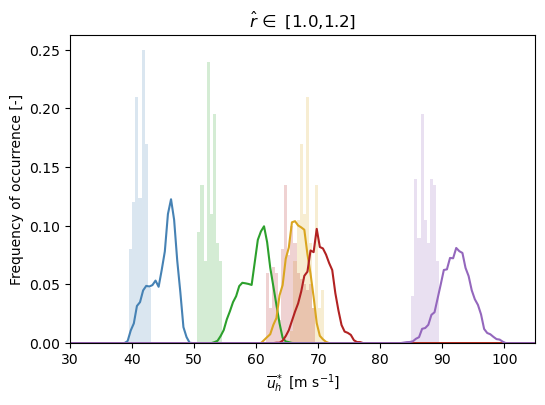

In [42]:
#%% Visualize distributions

ir = np.nanargmin(np.abs(r_incr_center - 1.1))

plt.figure(figsize=(6,4))
plt.title(r'$\hat{r} \, \in $ [' + str(np.round(r_incr[ir],1)) + ',' + str(np.round(r_incr[ir+1],1)) + ']')
for isim in np.arange(numSims):
    # plt.plot(bins_U_hh_center,distr_U_hh_d01[isim,ir,:],color=colores[isim],linestyle='--')
    plt.bar(bins_U_hh_center,distr_U_hh_d01[isim,ir,:],color=colores[isim],alpha=0.2,width=0.5)
    plt.plot(bins_U_hh_center,distr_U_hh_d02[isim,ir,:],color=colores[isim])
plt.ylim(0,1.05*np.nanmax(distr_U_hh_d01[:,ir,:]))
plt.xlim(30,105)
plt.ylabel('Frequency of occurrence [-]')
plt.xlabel(r'$\overline{u}^*_h$ [m s$^{-1}$]')
plt.show()


## Fit hub-height aligned profiles to power-law

In [29]:
#%% Fit hub-height aligned wind profiles to power-law 

## Domain d01
alpha_strmws_d01 = np.zeros_like(U_hh_d01) + np.nan
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(len(r_d01[isim,:])):
            if np.logical_not(np.isnan(r_d01[isim,ir])):
                # Get hub-height wind speed
                u_curr = U_hh_d01[isim,iazm,0,ir] + 0.0
                # Interpolate wind profile to finer vertical grid
                uv_interp = np.interp(z_interp,z_d01[isim,:-2],U_strmws_d01[isim,iazm,:-2,ir])
                popt, pcov,infodict,mesg,ier = curve_fit(powLaw, z_interp, uv_interp,full_output=True)
                if (ier==1) or (ier==2) or (ier==3) or (ier==4): # Solution was found
                    alpha_strmws_d01[isim,iazm,0,ir] = popt[0]
                else:
                    print(mesg)
                    STOP

## Domain d02
alpha_strmws_d02 = np.zeros_like(U_hh_d02) + np.nan
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(len(r_d02[isim,:])):
            if np.logical_not(np.isnan(r_d02[isim,ir])):
                # Get hub-height wind speed
                u_curr = U_hh_d02[isim,iazm,0,ir] + 0.0
                # Interpolate wind profile to finer vertical grid
                uv_interp = np.interp(z_interp,z_d02[isim,:-2],U_strmws_d02[isim,iazm,:-2,ir])
                popt, pcov,infodict,mesg,ier = curve_fit(powLaw, z_interp, uv_interp,full_output=True)
                if (ier==1) or (ier==2) or (ier==3) or (ier==4): # Solution was found
                    alpha_strmws_d02[isim,iazm,0,ir] = popt[0]
                else:
                    print(mesg)
                    STOP
            
print("The power-law wind profile is a better descriptor of winds in the mesoscale compared to the LES")

The power-law wind profile is a better descriptor of winds in the mesoscale compared to the LES


In [30]:
#%% Get distributions for radial locations of interest

# Define bins
bins_alpha = np.arange(0,0.2,0.005)
bins_alpha_center = 0.5*(bins_alpha[1:] + bins_alpha[0:-1])

## Domain d01
distr_alpha_d01 = np.zeros([numSims,len(r_incr_center),len(bins_alpha_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d01[isim,:]>r_incr[ir]) & (r_hat_d01[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(alpha_strmws_d01[isim,:,:,irrs].flatten(),bins=bins_alpha)
        temp_hist = temp_hist[0]
        distr_alpha_d01[isim,ir,:] = temp_hist/np.nansum(temp_hist)

## Domain d02
distr_alpha_d02 = np.zeros([numSims,len(r_incr_center),len(bins_alpha_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d02[isim,:]>r_incr[ir]) & (r_hat_d02[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(alpha_strmws_d02[isim,:,:,irrs].flatten(),bins=bins_alpha)
        temp_hist = temp_hist[0]
        distr_alpha_d02[isim,ir,:] = temp_hist/np.nansum(temp_hist)



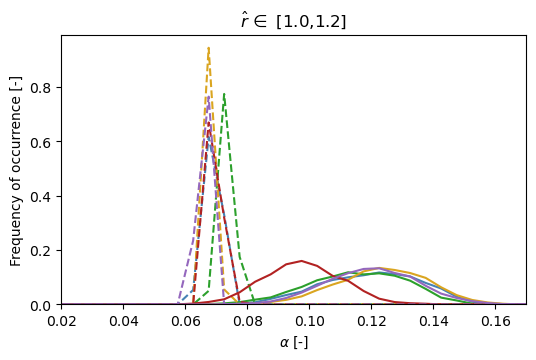

In [31]:
#%% Visualize distributions

ir = np.nanargmin(np.abs(r_incr_center - 1.1))

plt.figure(figsize=(6,3.5))
plt.title(r'$\hat{r} \, \in $ [' + str(np.round(r_incr[ir],1)) + ',' + str(np.round(r_incr[ir+1],1)) + ']')
for isim in np.arange(numSims):
    plt.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores[isim],linestyle='--')
    # plt.bar(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores[isim],alpha=0.2,width=0.005)
    plt.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores[isim])
plt.ylim(0,1.05*np.nanmax([np.nanmax(distr_alpha_d01[:,ir,:]),np.nanmax(distr_alpha_d02[:,ir,:])]))
plt.xlim(0.02,0.17)
plt.ylabel('Frequency of occurrence [-]')
plt.xlabel(r'$\alpha$ [-]')
plt.show()


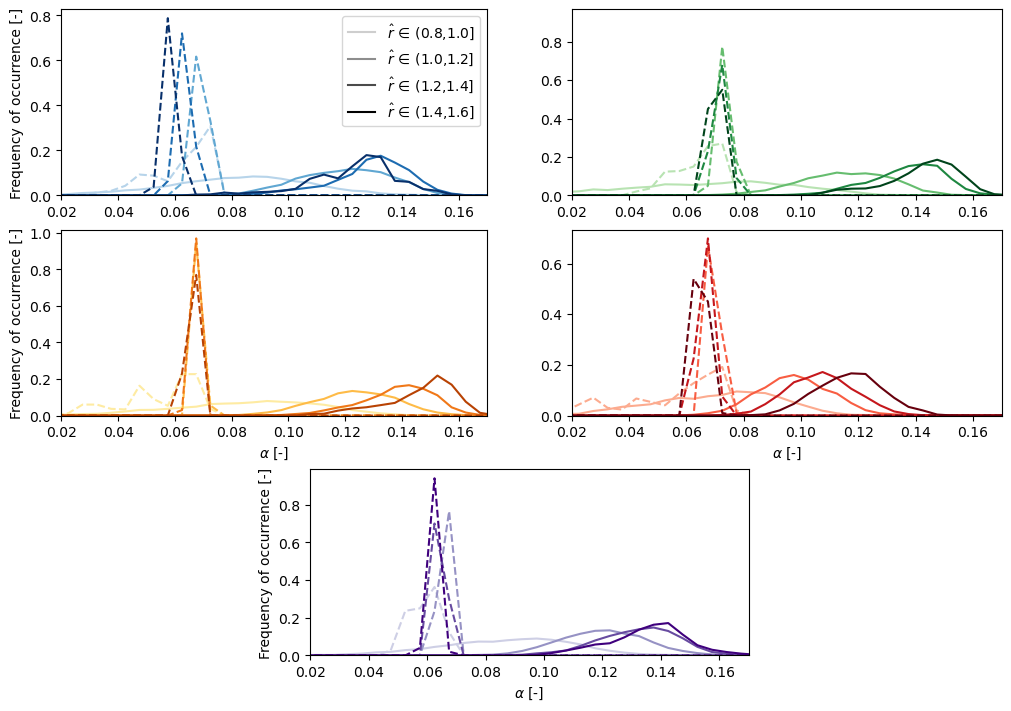

In [32]:
#%% Visualize distributions at different radial locations

rr_plot = r_incr_center[(r_incr_center>0.8)]

xLim = [0.02,0.17]

fig3 = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig3.add_gridspec(3,4)
f3_ax0 = fig3.add_subplot(gs[0, 0:2])
f3_ax1 = fig3.add_subplot(gs[0, 2:])
f3_ax2 = fig3.add_subplot(gs[1, 0:2])
f3_ax3 = fig3.add_subplot(gs[1, 2:])
f3_ax4 = fig3.add_subplot(gs[2, 1:3])


# Cat1 storm
isim = 0
colores_r = plt.cm.Blues(np.linspace(0.3,1,len(rr_plot)))
colores_r_legend = plt.cm.Greys(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax0.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax0.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores_r[rr])
    f3_ax0.plot(-1*bins_alpha_center,-1*distr_alpha_d02[isim,ir,:],color=colores_r_legend[rr],
                label=r'$\hat{r}\, \in \, ($' + str(np.round(r_incr[ir],1)) + ',' + str(np.round(r_incr[ir+1],1)) + ']')
f3_ax0.set_xlim(xLim)
f3_ax0.set_ylim(0,1.05*np.nanmax(distr_alpha_d01[isim,:,:]))
f3_ax0.set_ylabel('Frequency of occurrence [-]')
f3_ax0.legend()
# f3_ax0.xlabel(r'$\alpha$ [-]')

# Cat2 storm
isim = 1
colores_r = plt.cm.Greens(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax1.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax1.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores_r[rr])
f3_ax1.set_xlim(xLim)
f3_ax1.set_ylim(0,1.05*np.nanmax(distr_alpha_d01[isim,:,:]))
# f3_ax1.set_ylabel('Frequency of occurrence [-]')
# f3_ax1.xlabel(r'$\alpha$ [-]')

# Cat3 storm
isim = 2
colores_r = plt.cm.Oranges(np.linspace(0.3,1,len(rr_plot)))
colores_r = plt.cm.YlOrBr(np.linspace(0.2,0.8,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax2.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax2.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores_r[rr])
f3_ax2.set_xlim(xLim)
f3_ax2.set_ylim(0,1.05*np.nanmax(distr_alpha_d01[isim,:,:]))
f3_ax2.set_ylabel('Frequency of occurrence [-]')
f3_ax2.set_xlabel(r'$\alpha$ [-]')

# Cat4 storm
isim = 3
colores_r = plt.cm.Reds(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax3.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax3.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores_r[rr])
f3_ax3.set_xlim(xLim)
f3_ax3.set_ylim(0,1.05*np.nanmax(distr_alpha_d01[isim,:,:]))
# f3_ax3.set_ylabel('Frequency of occurrence [-]')
f3_ax3.set_xlabel(r'$\alpha$ [-]')

# Cat5 storm
isim = 4
colores_r = plt.cm.Purples(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax4.plot(bins_alpha_center,distr_alpha_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax4.plot(bins_alpha_center,distr_alpha_d02[isim,ir,:],color=colores_r[rr])
f3_ax4.set_xlim(xLim)
f3_ax4.set_ylim(0,1.05*np.nanmax(distr_alpha_d01[isim,:,:]))
f3_ax4.set_ylabel('Frequency of occurrence [-]')
f3_ax4.set_xlabel(r'$\alpha$ [-]')

plt.show()
plt.close()


In [33]:
np.shape(U_strmws_d01)

(5, 100, 29, 200)

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2044965/3443880897.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
/tmp/ipykernel_2044965/3443880897.py:20: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d01[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/3443880897.py:34: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d02[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/3443880897.py:20: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d01[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/3443880897.py:34: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d02[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/3443880897.py:20: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean

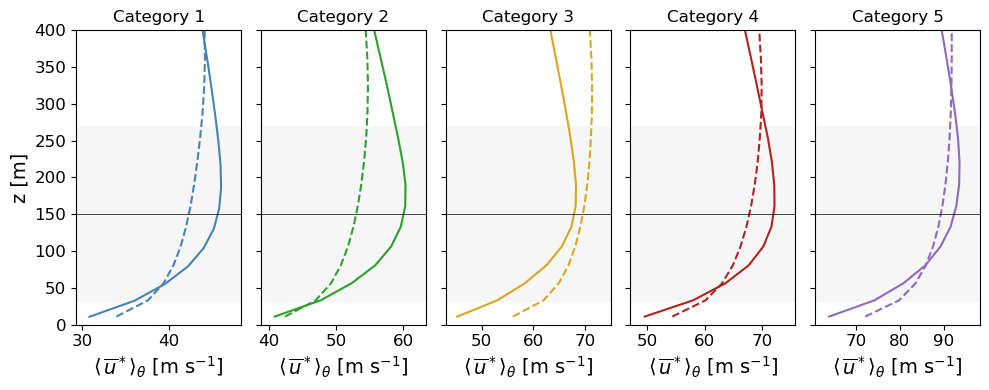

In [34]:
#%% Visualize wind profiles of turbine-aligned wind speed u^*

r_norm_loc_arr = [1.01] #np.arange(0.6,1.4+0.1,0.2)

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,400]

plt.figure(figsize=(10,4))
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])

    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(U_strmws_d01[isim,0,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d01[isim,:,iz,:],axis=0))
        if r_norm_loc==1:
            plt.plot(var,z_d01[isim,:],'--o',color=colores[isim])
        else:
            plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')
    limX_d01 = np.array([np.nanmin(var),np.nanmax(var)])
        
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(U_strmws_d02[isim,0,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d02[isim,:,iz,:],axis=0))
        plt.plot(var,z_d02[isim,:],color=colores[isim])
    limX_d02 = np.array([np.nanmin(var),np.nanmax(var)])
    
    ## Turbine rotor layer
    plt.fill([0,200,200,0],[z_hh-0.5*D_turb,z_hh-0.5*D_turb,z_hh+0.5*D_turb,z_hh+0.5*D_turb],
            edgecolor='none',facecolor='lightgrey',alpha=0.2)
    plt.plot([0,200],[z_hh,z_hh],'-k',linewidth=0.5)
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(U_strmws_d03[isim,0,:,0])
        for ir in np.arange(len(r_norm_loc_arr)):
            r_norm_loc = r_norm_loc_arr[ir]
            for iz in np.arange(len(z_d03[isim,:])):
                var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_strmws_d03[isim,:,iz,:],axis=0))
            plt.plot(var,z_d03[isim,:],color=colores[isim])
    
    
    ## Labels and limits
    xLim = [0.95*np.min([limX_d01[0],limX_d02[0]]),1.05*np.max([limX_d01[1],limX_d02[1]])]
    plt.ylim(yLim)
    plt.xlim(xLim)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{u}^*\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)
    plt.xticks(fontsize=12)
    
plt.tight_layout()
# if saveFig:
#     plt.savefig(dirFig + "NAME.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()


## Calculate wind veer using hub-height aligned profiles

In [35]:
# Define function that estimates vertical change in wind direction at one location
def delta_wDir_twoZ(wDir_z1,wDir_z2,z1,z2,normalize):
    wDir_low = wDir_z1
    wDir_high = wDir_z2
    
    delta = 0
    
    a = np.abs(wDir_high-wDir_low)
    b = np.abs(360-a)
    delta = np.min([a,b])

    if (wDir_high>=0) & (wDir_high<=90):
        if (wDir_low>=270) & (wDir_low<=360):
            delta = 1*delta
    elif (wDir_high>=270) & (wDir_high<=360):
        if (wDir_low>=0) & (wDir_low<=90):
            delta = -1*delta

    dz = z2-z1
    if dz>0:
        if normalize:
            delta = delta/dz
        
    return delta

In [36]:
#%% Calculate veer over layer at each radial location

normalize = False

# Heights for veer
z_top = z_hh + 0.5*D_turb
z_bott = z_hh - 0.5*D_turb

## Domain d01
veer_d01 = np.zeros_like(U_hh_d01) + np.nan
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(len(r_d01[isim,:])):
            dir_bott = np.interp(z_bott,z_d01[isim,:],wDir_d01[isim,iazm,:,ir])
            dir_top = np.interp(z_top,z_d01[isim,:],wDir_d01[isim,iazm,:,ir])
            veer_d01[isim,iazm,0,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

## Domain d02
veer_d02 = np.zeros_like(U_hh_d02) + np.nan
for isim in np.arange(numSims):
    for iazm in np.arange(azm):
        for ir in np.arange(len(r_d02[isim,:])):
            dir_bott = np.interp(z_bott,z_d02[isim,:],wDir_d02[isim,iazm,:,ir])
            dir_top = np.interp(z_top,z_d02[isim,:],wDir_d02[isim,iazm,:,ir])
            veer_d02[isim,iazm,0,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)

if use_prec:
    ## Domain d03
    veer_d03 = np.zeros_like(U_hh_d03) + np.nan
    for isim in np.arange(numSims):
        for iazm in np.arange(azm):
            for ir in np.arange(len(r_d03[isim,:])):
                dir_bott = np.interp(z_bott,z_d03[isim,:],wDir_d03[isim,iazm,:,ir])
                dir_top = np.interp(z_top,z_d03[isim,:],wDir_d03[isim,iazm,:,ir])
                veer_d03[isim,iazm,0,ir] = delta_wDir_twoZ(dir_bott,dir_top,z_bott,z_top,normalize)


In [37]:
#%% Get distributions for radial locations of interest

# Define bins
bins_veer = np.arange(0,40,1)
bins_veer_center = 0.5*(bins_veer[1:] + bins_veer[0:-1])

## Domain d01
distr_veer_d01 = np.zeros([numSims,len(r_incr_center),len(bins_veer_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d01[isim,:]>r_incr[ir]) & (r_hat_d01[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(veer_d01[isim,:,:,irrs].flatten(),bins=bins_veer)
        temp_hist = temp_hist[0]
        distr_veer_d01[isim,ir,:] = temp_hist/np.nansum(temp_hist)

## Domain d02
distr_veer_d02 = np.zeros([numSims,len(r_incr_center),len(bins_veer_center)])
for isim in np.arange(numSims):
    for ir in np.arange(len(r_incr_center)):
        # Radial locations within range
        irrs = (r_hat_d02[isim,:]>r_incr[ir]) & (r_hat_d02[isim,:]<=r_incr[ir+1])
        temp_hist = np.histogram(veer_d02[isim,:,:,irrs].flatten(),bins=bins_veer)
        temp_hist = temp_hist[0]
        distr_veer_d02[isim,ir,:] = temp_hist/np.nansum(temp_hist)



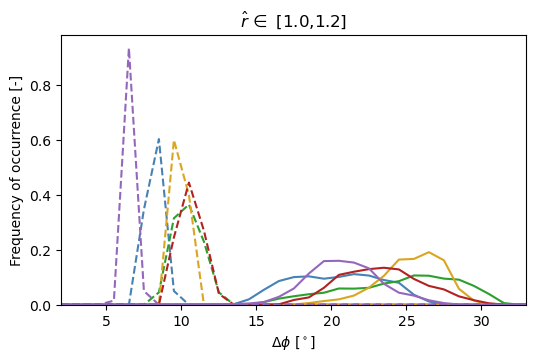

In [38]:
#%% Visualize distributions

ir = np.nanargmin(np.abs(r_incr_center - 1.1))

plt.figure(figsize=(6,3.5))
plt.title(r'$\hat{r} \, \in $ [' + str(np.round(r_incr[ir],1)) + ',' + str(np.round(r_incr[ir+1],1)) + ']')
for isim in np.arange(numSims):
    plt.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores[isim],linestyle='--')
    plt.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores[isim])
plt.ylim(0,1.05*np.nanmax([np.nanmax(distr_veer_d01[:,ir,:]),np.nanmax(distr_veer_d02[:,ir,:])]))
plt.xlim(2,33)
plt.ylabel('Frequency of occurrence [-]')
plt.xlabel(r'$\Delta \phi$ [$^\circ$]')
plt.show()


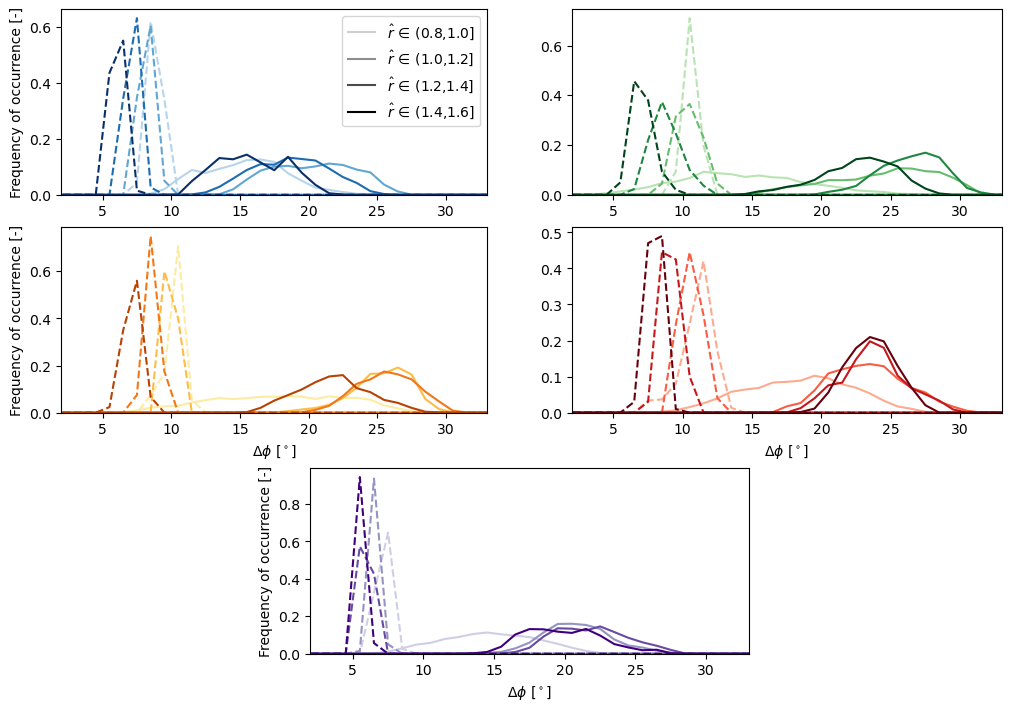

In [41]:
#%% Visualize distributions at different radial locations

rr_plot = r_incr_center[(r_incr_center>0.8)]

xLim = [2,33]

fig3 = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig3.add_gridspec(3,4)
f3_ax0 = fig3.add_subplot(gs[0, 0:2])
f3_ax1 = fig3.add_subplot(gs[0, 2:])
f3_ax2 = fig3.add_subplot(gs[1, 0:2])
f3_ax3 = fig3.add_subplot(gs[1, 2:])
f3_ax4 = fig3.add_subplot(gs[2, 1:3])


# Cat1 storm
isim = 0
colores_r = plt.cm.Blues(np.linspace(0.3,1,len(rr_plot)))
colores_r_legend = plt.cm.Greys(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax0.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax0.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores_r[rr])
    f3_ax0.plot(-1*bins_veer_center,-1*distr_veer_d02[isim,ir,:],color=colores_r_legend[rr],
                label=r'$\hat{r}\, \in \, ($' + str(np.round(r_incr[ir],1)) + ',' + str(np.round(r_incr[ir+1],1)) + ']')
f3_ax0.set_xlim(xLim)
f3_ax0.set_ylim(0,1.05*np.nanmax(distr_veer_d01[isim,:,:]))
f3_ax0.set_ylabel('Frequency of occurrence [-]')
f3_ax0.legend()
# f3_ax0.xlabel(r'$\Delta \phi$ [$^\circ$]')

# Cat2 storm
isim = 1
colores_r = plt.cm.Greens(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax1.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax1.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores_r[rr])
f3_ax1.set_xlim(xLim)
f3_ax1.set_ylim(0,1.05*np.nanmax(distr_veer_d01[isim,:,:]))
# f3_ax1.set_ylabel('Frequency of occurrence [-]')
# f3_ax1.xlabel(r'$\Delta \phi$ [$^\circ$]')

# Cat3 storm
isim = 2
colores_r = plt.cm.Oranges(np.linspace(0.3,1,len(rr_plot)))
colores_r = plt.cm.YlOrBr(np.linspace(0.2,0.8,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax2.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax2.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores_r[rr])
f3_ax2.set_xlim(xLim)
f3_ax2.set_ylim(0,1.05*np.nanmax(distr_veer_d01[isim,:,:]))
f3_ax2.set_ylabel('Frequency of occurrence [-]')
f3_ax2.set_xlabel(r'$\Delta \phi$ [$^\circ$]')

# Cat4 storm
isim = 3
colores_r = plt.cm.Reds(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax3.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax3.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores_r[rr])
f3_ax3.set_xlim(xLim)
f3_ax3.set_ylim(0,1.05*np.nanmax(distr_veer_d01[isim,:,:]))
# f3_ax3.set_ylabel('Frequency of occurrence [-]')
f3_ax3.set_xlabel(r'$\Delta \phi$ [$^\circ$]')

# Cat5 storm
isim = 4
colores_r = plt.cm.Purples(np.linspace(0.3,1,len(rr_plot)))
for rr in np.arange(len(rr_plot)):
    ir = np.nanargmin(np.abs(r_incr_center - rr_plot[rr]))
    f3_ax4.plot(bins_veer_center,distr_veer_d01[isim,ir,:],color=colores_r[rr],linestyle='--')
    f3_ax4.plot(bins_veer_center,distr_veer_d02[isim,ir,:],color=colores_r[rr])
f3_ax4.set_xlim(xLim)
f3_ax4.set_ylim(0,1.05*np.nanmax(distr_veer_d01[isim,:,:]))
f3_ax4.set_ylabel('Frequency of occurrence [-]')
f3_ax4.set_xlabel(r'$\Delta \phi$ [$^\circ$]')

plt.show()
plt.close()


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2044965/1049051305.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
/tmp/ipykernel_2044965/1049051305.py:21: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d01[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/1049051305.py:35: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d02[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/1049051305.py:21: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d01[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/1049051305.py:35: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d02[isim,:,iz,:],axis=0))
/tmp/ipykernel_2044965/1049051305.py:21: RuntimeWarning: Mean of empty slice
  var[iz] = np.interp(r_norm_loc,rr,np.nan

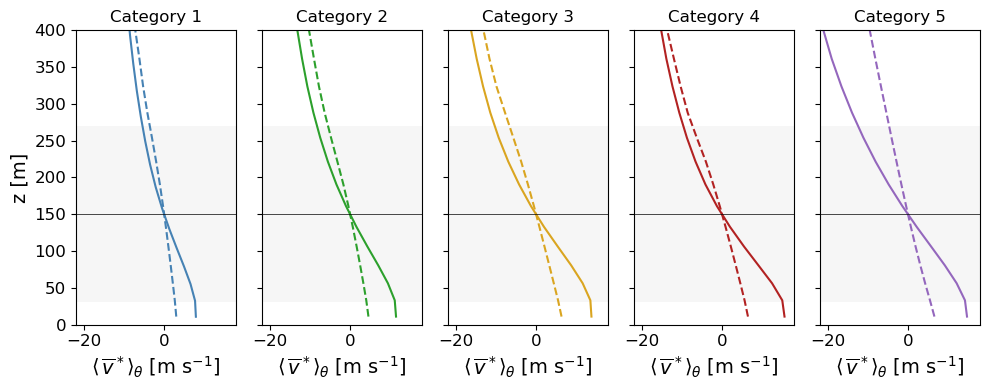

In [40]:
#%% Visualize wind profiles of turbine-aligned wind speed v^*

r_norm_loc_arr = [1.01] #np.arange(0.6,1.4+0.1,0.2)

yLim = np.array([0,np.nanmin(np.nanmax(z_d01,axis=1))])
yLim = [0,400]
xLim_ = [-22,18]

plt.figure(figsize=(10,4))
for isim in np.arange(numSims):
    plt.subplot(1,numSims,isim+1)
    plt.title(r"$T_s$ = " + labels[isim] + "$^\circ$C")
    plt.title(r"Category " + labels_cat[isim])

    ## Domain d01
    rr = r_d01[isim,:]/R_d01[isim]
    var = np.zeros_like(U_crsstrm_d01[isim,0,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d01[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d01[isim,:,iz,:],axis=0))
        if r_norm_loc==1:
            plt.plot(var,z_d01[isim,:],'--o',color=colores[isim])
        else:
            plt.plot(var,z_d01[isim,:],color=colores[isim],linestyle='--')
    limX_d01 = np.array([np.nanmin(var),np.nanmax(var)])
        
    
    ## Domain d02
    rr = r_d02[isim,:]/R_d02[isim]
    var = np.zeros_like(U_crsstrm_d02[isim,0,:,0])
    for ir in np.arange(len(r_norm_loc_arr)):
        r_norm_loc = r_norm_loc_arr[ir]
        for iz in np.arange(len(z_d02[isim,:])):
            var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d02[isim,:,iz,:],axis=0))
        plt.plot(var,z_d02[isim,:],color=colores[isim])
    limX_d02 = np.array([np.nanmin(var),np.nanmax(var)])
    
    ## Turbine rotor layer
    plt.fill([-100,100,100,-100],[z_hh-0.5*D_turb,z_hh-0.5*D_turb,z_hh+0.5*D_turb,z_hh+0.5*D_turb],
            edgecolor='none',facecolor='lightgrey',alpha=0.2)
    plt.plot([-100,200],[z_hh,z_hh],'-k',linewidth=0.5)
    
    if use_prec:
        ## Domain d03
        rr = r_d03[isim,:]/R_d03[isim]
        var = np.zeros_like(U_crsstrm_d03[isim,0,:,0])
        for ir in np.arange(len(r_norm_loc_arr)):
            r_norm_loc = r_norm_loc_arr[ir]
            for iz in np.arange(len(z_d03[isim,:])):
                var[iz] = np.interp(r_norm_loc,rr,np.nanmean(U_crsstrm_d03[isim,:,iz,:],axis=0))
            plt.plot(var,z_d03[isim,:],color=colores[isim])
    
    
    ## Labels and limits
    xLim = [0.95*np.min([limX_d01[0],limX_d02[0]]),1.05*np.max([limX_d01[1],limX_d02[1]])]
    plt.ylim(yLim)
    plt.xlim(xLim)
    plt.xlim(xLim_)
    if isim==0:
        plt.ylabel('z [m]',fontsize=14)
        locs,labs = plt.yticks(fontsize=12)
    else:
        plt.yticks(locs,'')
    plt.ylim(yLim)
    plt.xlabel(r'$\langle\,\overline{v}^*\rangle_{\theta}$ [m s$^{-1}$]',fontsize=14)
    plt.xticks(fontsize=12)
    
plt.tight_layout()
# if saveFig:
#     plt.savefig(dirFig + "NAME.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
plt.show()
